# single-logic-qubit

In [15]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
global sigma_x, sigma_y, sigma_z, identity
 # 定义泡利矩阵
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
identity = np.array([[1, 0], [0, 1]], dtype=complex)

def apply_channel(rho_ab, KA):
    #rho_ab_new = np.zeros([4,4], dtype=complex)
    rho_ab_new = KA @ rho_ab @ np.conjugate(KA.T)
    return rho_ab_new 


def quantum_mutual_information(rho_ab, rho_a, rho_b):
    """
    计算两个量子系统之间的量子互信息。

    参数:
    rho_ab (numpy.ndarray): 两个系统的联合密度矩阵。
    rho_a (numpy.ndarray): 第一个系统的密度矩阵。
    rho_b (numpy.ndarray): 第二个系统的密度矩阵。
    """
    rho_ab_eig = np.linalg.eig(rho_ab)[0]
    rho_a_eig = np.linalg.eig(rho_a)[0]
    rho_b_eig = np.linalg.eig(rho_b)[0]
    S_ab,S_a,S_b = 0,0,0
    threshold = 1e-10
    for i in range(len(rho_ab_eig)):
        if (rho_ab_eig[i]!=0) and (np.abs(rho_ab_eig[i])>threshold):
            S_ab -= rho_ab_eig[i] * np.log2(rho_ab_eig[i])
    for i in range(len(rho_a_eig)):
        if rho_a_eig[i] != 0:
            S_a -= rho_a_eig[i] * np.log2(rho_a_eig[i])
        if rho_b_eig[i] != 0:
            S_b -= rho_b_eig[i] * np.log2(rho_b_eig[i])
    I = S_a + S_b - S_ab
    return I

def quantum_EI(K):
    
    KA = np.kron(K, identity)
    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)
    rho_ab_new = apply_channel(rho_ab, KA)
    print(rho_ab_new)
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    print(rho_a_new,rho_b_new)
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI
    
def quantum1_EI(p):
    '''专用于信道：K1=np.kron(np.sqrt(1-p)*identity,identity)，K2=np.kron(np.sqrt(p)* sigma_z,identity)'''
    identity = np.array([[1, 0], [0, 1]], dtype=complex)
    K1=np.kron(np.sqrt(1-p)*identity,identity)
    K2=np.kron(np.sqrt(p)* sigma_z,identity)


    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)

    rho_ab_new =K1 @ rho1 @ np.conjugate(K1.T)+K2 @ rho1 @ np.conjugate(K2.T)
    
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI
def quantum2_EI(p):
    '''专用于退极化信道
    '''
    K1=np.kron(np.sqrt(1-3*p/4)*identity,identity)
    K2=np.kron(0.5*np.sqrt(p)* sigma_x,identity)
    K3=np.kron(0.5*np.sqrt(p)* sigma_y,identity)
    K4=np.kron(0.5*np.sqrt(p)* sigma_z,identity)

    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)

    rho_ab_new =K1 @ rho1 @ np.conjugate(K1.T)+K2 @ rho1 @ np.conjugate(K2.T)+K3 @ rho1 @ np.conjugate(K3.T)+K4 @ rho1 @ np.conjugate(K4.T)
    
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI

def quantum4_EI(p):
    identity = np.array([[1, 0], [0, 1]], dtype=complex)
    K1=np.kron(1/np.sqrt(2*(1+p**2))*(p*sigma_z+identity),identity)
    K2=np.kron(1/np.sqrt(2*(1+p**2))*(-p*sigma_z+identity),identity)


    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)

    rho_ab_new =K1 @ rho1 @ np.conjugate(K1.T)+K2 @ rho1 @ np.conjugate(K2.T)
    
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI    
def possible_mutual_information(p):
    '计算EI的其他方法？'
    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)

    rho_ab_new =K1 @ rho1 @ np.conjugate(K1.T)+K2 @ rho1 @ np.conjugate(K2.T)
    
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI
    


In [2]:
'简化偏迹运算'
def binary_to_decimal(binary_str):
    # 检查输入是否为二进制字符串
    if not all(char in '01' for char in binary_str):
        raise ValueError("Input string is not a binary number")
    
    # 将二进制字符串转换为十进制数
    decimal_number = int(binary_str, 2)
    return decimal_number

def join_numbers_to_string(*numbers):
    # 将数字转换为字符串并拼接
    return ''.join(str(number) for number in numbers)
def partial_trace2(rho, dim_reduce):
    '''专用于5对量子纠缠，维度可增减，通过增减for嵌套数'''
    rho_A = np.zeros((dim_reduce, dim_reduce), dtype=complex)
    rho_B = np.zeros((dim_reduce, dim_reduce), dtype=complex)
    
    # for i1, j1,i11,j11 in itertools.product(range(2), range(2),range(2), range(2)):
    #     for i2, j2,i22,j22 in itertools.product(range(2), range(2),range(2), range(2)):
    #         for i3, j3,i33,j33 in itertools.product(range(2), range(2),range(2), range(2)):
    #             for i4, j4,i44,j44 in itertools.product(range(2), range(2),range(2), range(2)):
    #                 for i5, j5,i55,j55 in itertools.product(range(2), range(2),range(2), range(2)):
    for i1, j1, i11, j11, i2, j2, i22, j22, \
        i3, j3, i33, j33, i4, j4, i44, j44, i5, j5, i55, j55 in itertools.product(range(2), repeat=20):
        idxB0 = binary_to_decimal(join_numbers_to_string(i1, i2, i3, i4, i5))
        idxB1 = binary_to_decimal(join_numbers_to_string(i11, i22, i33, i44, i55))
        idxA0 = binary_to_decimal(join_numbers_to_string(j1, j2, j3, j4, j5))
        idxA1 = binary_to_decimal(join_numbers_to_string(j11, j22, j33, j44, j55))
        idx0 = binary_to_decimal(join_numbers_to_string(i1, j1, i2, j2, i3, j3, i4, j4, i5, j5))
        idx1 = binary_to_decimal(join_numbers_to_string(i11, j11, i22, j22, i33, j33, i44, j44, i55, j55))
    
        if i1 == i11 and i2 == i22 and i3 == i33  and i4 == i44  and i5 == i55:
            rho_A[idxA0, idxA1] += rho[idx0, idx1]  
            
        if j1 == j11 and j2 == j22 and j3 == j33  and j4 == j44  and j5 == j55:
            rho_B[idxB0, idxB1] += rho[idx0, idx1]
    
    return rho_A, rho_B

In [3]:
'未简化版本'
def partial_trace(rho, dim_reduce):
    '''专用于5对量子纠缠，维度可增减，通过增减for嵌套数'''
    rho_A = np.zeros((dim_reduce, dim_reduce), dtype=complex)
    rho_B = np.zeros((dim_reduce, dim_reduce), dtype=complex)
    for i1, j1,i11,j11 in itertools.product(range(2), range(2),range(2), range(2)):
        for i2, j2,i22,j22 in itertools.product(range(2), range(2),range(2), range(2)):
            for i3, j3,i33,j33 in itertools.product(range(2), range(2),range(2), range(2)):
                for i4, j4,i44,j44 in itertools.product(range(2), range(2),range(2), range(2)):
                    for i5, j5,i55,j55 in itertools.product(range(2), range(2),range(2), range(2)):
                        
                        rho_A[2**4*j1+2**3*j2+2**2*j3+2**1*j4+j5,2**4*j11+2**3*j22+2**2*j33+2**1*j44+j55] \
                        += rho[2**9*i1+2**8*j1+2**7*i2+2**6*j2+2**5*i3+2**4*j3+2**3*i4+2**2*j4+2*i5+j5\
                        ,2**9*i11+2**8*j11+2**7*i22+2**6*j22+2**5*i33+2**4*j33+2**3*i44+2**2*j44+2*i55+j55]if i1 == i11 \
                        and i2 == i22 and i3 == i33  and i4 == i44  and i5 == i55 else 0
                        rho_B[2**4*i1+2**3*i2+2**2*i3+2**1*i4+i5,2**4*i11+2**3*i22+2**2*i33+2**1*i44+i55] \
                        += rho[2**9*i1+2**8*j1+2**7*i2+2**6*j2+2**5*i3+2**4*j3+2**3*i4+2**2*j4+2*i5+j5\
                        ,2**9*i11+2**8*j11+2**7*i22+2**6*j22+2**5*i33+2**4*j33+2**3*i44+2**2*j44+2*i55+j55]if j1 == j11 \
                        and j2 == j22 and j3 == j33  and j4 == j44  and j5 == j55 else 0
    
    return rho_A,rho_B
    

In [4]:
def quantum5_EI(p):
    # 定义 Bell 态 |Ψ> = (|00> + |11>) / sqrt(2)
    n=5 # 纠缠对数目
    zero = np.array([1, 0])
    one = np.array([0, 1])
    bell_state = (np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)
    total_state = bell_state
    
    
    # 构造联合密度矩阵 ρ_total = |ψ><ψ|
    rho_total = np.outer(total_state, total_state.conj())
    
    # 系统 A 和 B 的维度都是 2^5（5 个量子比特系统）
    dim_A = 2**n  # A1, A2, A3, A4, A5 系统
    dim_B = 2**n  # B1, B2, B3, B4, B5 系统
    
  
    K1=1/np.sqrt(2*(1+p**2))*(p*sigma_z+identity)
    K2=1/np.sqrt(2*(1+p**2))*(-p*sigma_z+identity)

    K1_I= np.kron(K1, np.eye(2))
    K2_I= np.kron(K2, np.eye(2))
    '''for _ in range(n-1):
        K1_I=np.kron( K1_I,np.kron(K1, np.eye(2)))
        K2_I=np.kron( K2_I,np.kron(K2, np.eye(2)))
    '''
   
    rho_after_flip1 = K1_I @rho_total@ np.conjugate(K1_I.T)+ K2_I @rho_total@ np.conjugate(K2_I.T)
    rho_after_flip=rho_after_flip1
    for _ in range(n-1):
        rho_after_flip=np.kron(rho_after_flip,rho_after_flip1)
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    rho_A,rho_B= partial_trace2(rho_after_flip, dim_A)
    
    EI = quantum_mutual_information(rho_after_flip, rho_A, rho_B)

    # 输出特征值
    return EI
    
def quantum6_EI(p):
    '''用np.reshape()作偏迹'''
    # 定义 Bell 态 |Ψ> = (|00> + |11>) / sqrt(2)
    n=5 # 纠缠对数目
    zero = np.array([1, 0])
    one = np.array([0, 1])
    bell_state = (np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)
    total_state = bell_state
    
    
    # 构造联合密度矩阵 ρ_total = |ψ><ψ|
    rho_total = np.outer(total_state, total_state.conj())
    
    # 系统 A 和 B 的维度都是 2^5（5 个量子比特系统）
    dim_A = 2**n  # A1, A2, A3, A4, A5 系统
    dim_B = 2**n  # B1, B2, B3, B4, B5 系统
    
  
    K1=1/np.sqrt(2*(1+p**2))*(p*sigma_z+identity)
    K2=1/np.sqrt(2*(1+p**2))*(-p*sigma_z+identity)

    K1_I= np.kron(K1, np.eye(2))
    K2_I= np.kron(K2, np.eye(2))
    '''for _ in range(n-1):
        K1_I=np.kron( K1_I,np.kron(K1, np.eye(2)))
        K2_I=np.kron( K2_I,np.kron(K2, np.eye(2)))
    '''
   
    rho_after_flip1 = K1_I @rho_total@ np.conjugate(K1_I.T)+ K2_I @rho_total@ np.conjugate(K2_I.T)
    rho_after_flip=rho_after_flip1
    for _ in range(n-1):
        rho_after_flip=np.kron(rho_after_flip,rho_after_flip1)
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    rho_A= partial_trace2(rho_after_flip, dim_A)
    # 1. reshape 成 4 维张量，形状为 (32, 32, 32, 32)
    reshaped_matrix = rho_after_flip.reshape(2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2)
    
    # 2. 通过 np.transpose 交换系统 A 和系统 B 的位置
    # 交换第 1 和第 2 维，得到 (32, 32, 32, 32)
    swapped_matrix = np.transpose(reshaped_matrix, axes=(1, 0, 3, 2,5,4,7,6,9,8,11,10,13,12,15,14,17,16,19,18))
    
    # 3. 将交换后的矩阵 reshape 回 1024x1024 的矩阵
    final_matrix = swapped_matrix.reshape(1024,1024)
    rho_B= partial_trace2(final_matrix, dim_B)
    
    EI = quantum_mutual_information(rho_after_flip, rho_A, rho_B)
    return EI

# New experiments

In [45]:
# 对不同的p作图
def quantum_mutual_information(rho_ab, rho_a, rho_b):
    """
    计算两个量子系统之间的量子互信息。

    参数:
    rho_ab (numpy.ndarray): 两个系统的联合密度矩阵。
    rho_a (numpy.ndarray): 第一个系统的密度矩阵。
    rho_b (numpy.ndarray): 第二个系统的密度矩阵。
    """
    rho_ab_eig = np.linalg.eig(rho_ab)[0]
    rho_a_eig = np.linalg.eig(rho_a)[0]
    rho_b_eig = np.linalg.eig(rho_b)[0]
    S_ab,S_a,S_b = 0,0,0
    threshold = 1e-10
    for i in range(len(rho_ab_eig)):
        if (rho_ab_eig[i]!=0) and (np.abs(rho_ab_eig[i])>threshold):
            S_ab -= rho_ab_eig[i] * np.log2(rho_ab_eig[i])
    for i in range(len(rho_a_eig)):
        if rho_a_eig[i] != 0:
            S_a -= rho_a_eig[i] * np.log2(rho_a_eig[i])
        if rho_b_eig[i] != 0:
            S_b -= rho_b_eig[i] * np.log2(rho_b_eig[i])
    I = S_a + S_b - S_ab
    return I, S_a, S_b, S_ab

def add_noise_one(rho_total, mat, p, noise="type1"):
    if noise=="type1":
        K1=1/np.sqrt(2*(1+p**2))*mat @ (identity+p*sigma_x)
        K2=1/np.sqrt(2*(1+p**2))*mat @ (identity-p*sigma_x)
        K1_I= np.kron(K1, np.eye(2))
        K2_I= np.kron(K2, np.eye(2))
        rho_after_flip = K1_I @rho_total@ np.conjugate(K1_I.T)+ K2_I @rho_total@ np.conjugate(K2_I.T)
    elif noise=="type2":
        K1=np.sqrt(1-3*p/4) * mat @ identity
        K2=0.5*np.sqrt(p)* mat @ sigma_x
        K3=0.5*np.sqrt(p)* mat @ sigma_y
        K4=0.5*np.sqrt(p)* mat @ sigma_z
        K1_I= np.kron(K1, np.eye(2))
        K2_I= np.kron(K2, np.eye(2))
        K3_I= np.kron(K3, np.eye(2))
        K4_I= np.kron(K4, np.eye(2))
        rho_after_flip = K1_I @rho_total@ np.conjugate(K1_I.T) + K2_I @rho_total@ np.conjugate(K2_I.T) + K3_I @rho_total@ np.conjugate(K3_I.T) + K4_I @rho_total@ np.conjugate(K4_I.T)
    return rho_after_flip

def quantum5_EI(mat_ls, p, n, noise="type1"):
    # 定义 Bell 态 |Ψ> = (|00> + |11>) / sqrt(2)
    # 纠缠对数目 n
    zero = np.array([1, 0])
    one = np.array([0, 1])
    bell_state = (np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)
    total_state = bell_state
    
    
    # 构造联合密度矩阵 ρ_total = |ψ><ψ|
    rho_total = np.outer(total_state, total_state.conj())
    
    # 系统 A 和 B 的维度都是 2^5（5 个量子比特系统）
    dim_A = 2**n  # A1, A2, A3, A4, A5 系统
    dim_B = 2**n  # B1, B2, B3, B4, B5 系统
    
    rho_after_flip = add_noise_one(rho_total, mat_ls[0], p, noise=noise)
    for i in range(n-1):

        rho_after_flip1 = add_noise_one(rho_total, mat_ls[i+1], p, noise=noise)
    
        rho_after_flip = np.kron(rho_after_flip,rho_after_flip1)
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    # 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
    # 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
    rho_A,rho_B= partial_trace2(rho_after_flip, dim_A)
    
    EI, S_a, S_b, S_ab = quantum_mutual_information(rho_after_flip, rho_A, rho_B)

    # 输出特征值
    return EI, S_a, S_b-S_ab

# n = 5
# np.random.seed(33)
# mat_ls = []
# for i in range(n):
#     mat_ls.append(unitary_group.rvs(2))

# p_values = np.linspace(0, 1, 20)
# f_values=[]
# # 计算对应的函数值
# for p in p_values:
#     f_values.append(quantum5_EI(mat_ls, p, n).real)

# plt.plot(p_values, f_values, label=r'$EI$')
# plt.xlabel('p')
# plt.ylabel('EI')
# plt.title('seed='+str(seed))

# plt.grid(True)
# plt.show()

In [33]:
def calculate_differences(matrix_list):
    differences = []
    for i in range(len(matrix_list)):
        for j in range(i + 1, len(matrix_list)):
            differences.append(np.sum(np.abs(matrix_list[i] - matrix_list[j])))
    return np.mean(differences)

calculate_differences(mat_ls)

3.201363628738831

100%|██████████| 20/20 [05:46<00:00, 17.33s/it]


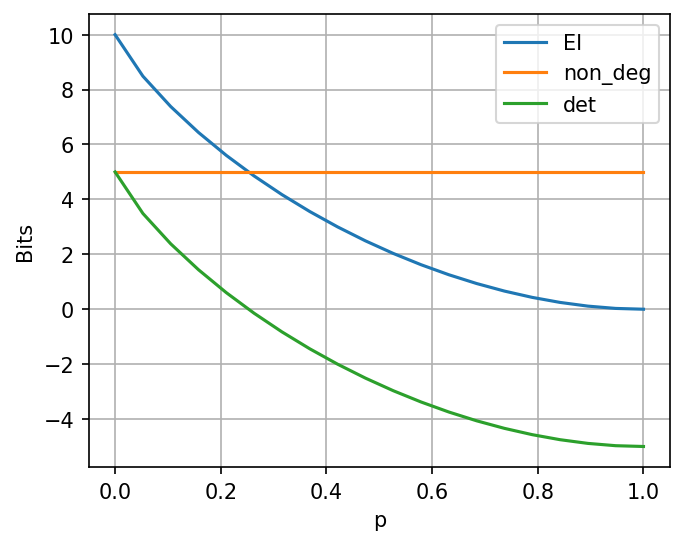

In [46]:
from tqdm import tqdm
t = 20
n = 5
plt.figure(figsize=(5,4), dpi=150)
for seed in range(1,2):
    np.random.seed(seed)
    mat_ls = []
    for i in range(n):
        mat_ls.append(unitary_group.rvs(2))
        
    if seed==42:
        mat_ls = [sigma_x for _ in range(n)]
        
    diff = calculate_differences(mat_ls)
    p_values = np.linspace(0, 1, t)
    EI_ls = []
    deg_a_ls = []
    deg_b_ls = []
    # 计算对应的函数值
    for p in tqdm(p_values):
        EI, non_deg, det = quantum5_EI(mat_ls, p, n, noise="type2")
        EI_ls.append(EI.real)
        deg_a_ls.append(non_deg.real)
        deg_b_ls.append(det.real)

    plt.plot(p_values, EI_ls, label="EI")#'diff='+str(np.round(diff, 3)))
    plt.plot(p_values, deg_a_ls, label="non_deg")
    plt.plot(p_values, deg_b_ls, label="det")

    #plt.title('seed='+str(seed))
plt.xlabel('p')
plt.ylabel('Bits')
plt.legend()
plt.grid(True)
plt.show()

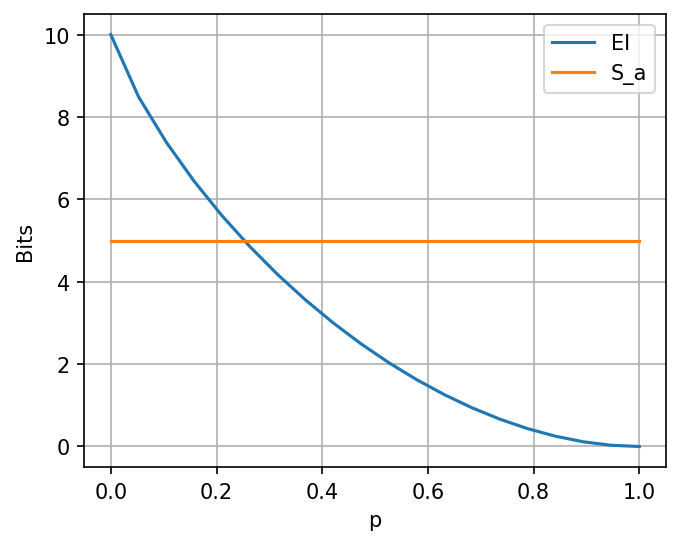

In [44]:
plt.figure(figsize=(5,4), dpi=150)
plt.plot(p_values, EI_ls, label="EI")#'diff='+str(np.round(diff, 3)))
plt.plot(p_values, deg_a_ls, label="S_a")
#plt.plot(p_values, deg_b_ls, label="S_b")

    #plt.title('seed='+str(seed))
plt.xlabel('p')
plt.ylabel('Bits')
plt.legend()
plt.grid(True)
plt.show()

100%|██████████| 30/30 [08:42<00:00, 17.42s/it]


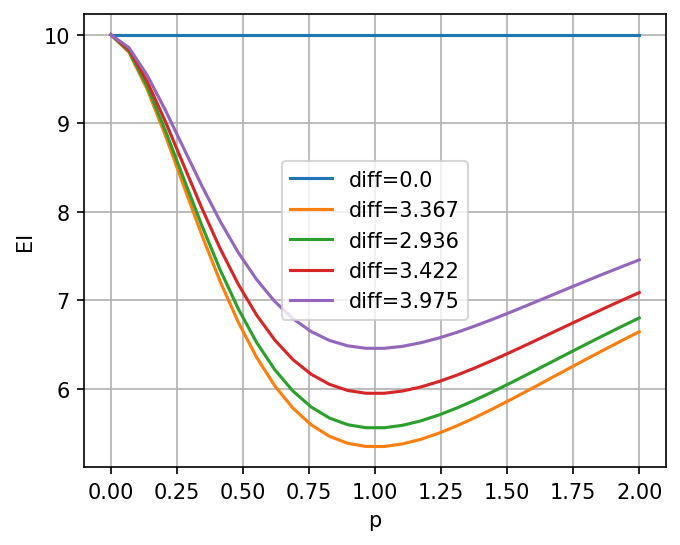

In [36]:
from tqdm import tqdm
t = 30
n = 5
plt.figure(figsize=(5,4), dpi=150)
for seed in range(5):
    np.random.seed(seed)
    mat_ls = []
    for i in range(n):
        mat_ls.append(unitary_group.rvs(2))
        
    if seed==0:
        mat_ls = [identity for _ in range(n)]
        
    diff = calculate_differences(mat_ls)
    p_values = np.linspace(0, 2, t)
    f_values=[]
    # 计算对应的函数值
    for p in tqdm(p_values):
        f_values.append(quantum5_EI(mat_ls, p, n).real)

    plt.plot(p_values, f_values, label='diff='+str(np.round(diff, 3)))

    #plt.title('seed='+str(seed))
plt.xlabel('p')
plt.ylabel('EI')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import numpy as np
from scipy.stats import unitary_group

def generate_unitary_matrix():
    return unitary_group.rvs(2)

mat = generate_unitary_matrix()
mat @ np.conjugate(mat.T)

array([[1.00000000e+00-1.53771377e-17j, 5.55111512e-17+1.11022302e-16j],
       [5.55111512e-17-1.66533454e-16j, 1.00000000e+00-2.59981721e-17j]])

In [26]:
p=0.3

K1=1/np.sqrt(2*(1+p**2))*(mat+p*identity)
K2=1/np.sqrt(2*(1+p**2))*(mat-p*identity)
K1 @ np.conjugate(K1.T) + K2 @ np.conjugate(K2.T)

array([[1.00000000e+00-1.76642928e-17j, 5.55111512e-17+1.38777878e-16j],
       [5.55111512e-17-1.52655666e-16j, 1.00000000e+00-9.01841229e-18j]])

In [124]:
gamma = 0.1
K = np.sqrt(1-p)*identity + p* sigma_x
quantum_EI(K)

[[nan+nanj nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj nan+nanj]]


/var/folders/_7/c2qjlvh92vv9g55l_09xk4g80000gn/T/ipykernel_40675/3846761737.py:2: RuntimeWarning: invalid value encountered in sqrt
  K = np.sqrt(1-p)*identity + p* sigma_x


TypeError: partial_trace() missing 1 required positional argument: 'dim_reduce'

In [126]:
# 定义 Bell 态 |Ψ> = (|00> + |11>) / sqrt(2)
zero = np.array([1, 0])
one = np.array([0, 1])
bell_state = (np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)

# 构造5对系统 A1B1, A2B2, A3B3, A4B4, A5B5 的 Bell 态张量积
total_state = bell_state
for _ in range(1):
    total_state = np.kron(total_state, bell_state)

# 构造联合密度矩阵 ρ_total = |ψ><ψ|
rho_total = np.outer(total_state, total_state.conj())

rho_A,rho_B = partial_trace(rho_total, 4)

eigenvalues=np.linalg.eigvals(rho_total)
eigenvalues_A = np.linalg.eigvals(rho_A)
eigenvalues_B = np.linalg.eigvals(rho_B)
# 筛选出特征值绝对值大于 10e-10 的值
eigenvalues_A_filtered = eigenvalues_A[np.abs(eigenvalues_A) > 1e-10]
eigenvalues_B_filtered = eigenvalues_B[np.abs(eigenvalues_B) > 1e-10]
eigenvalues_filtered = eigenvalues[np.abs(eigenvalues) > 1e-10]
# 输出筛选后的系统 A 和系统 B 的特征值
print("系统 A 的筛选后特征值:", eigenvalues_A_filtered)
print("系统 B 的筛选后特征值:", eigenvalues_B_filtered)
print("系统的筛选后特征值:", eigenvalues_filtered)


IndexError: index 4 is out of bounds for axis 1 with size 4

In [127]:
bit1_t1 = K1 @ rho1 @ np.conjugate(K1.T)+K2 @ rho1 @ np.conjugate(K2.T)
bit1_t1

array([[ 0.5       +0.j,  0.        +0.j,  0.        +0.j,
        -0.49009901+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [-0.49009901+0.j,  0.        +0.j,  0.        +0.j,
         0.5       +0.j]])

In [128]:
quantum1_EI(K1,K2,bit1_t1)

TypeError: quantum1_EI() takes 1 positional argument but 3 were given

In [129]:
# 定义 Pauli-X 操作符（比特翻转信道）
X = np.array([[0, 1], [1, 0]])

# 定义标准基态
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

# 构造最大纠缠态 |Φ+> = (|00> + |11>)/sqrt(2)
bell_state = (np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)

# 构造两个系统 A1B1 和 A2B2 的最大纠缠态的张量积
initial_state = np.kron(bell_state, bell_state)

# 构造密度矩阵 ρ = |ψ><ψ|
rho = np.outer(initial_state, initial_state.conj())

# 定义作用在 A1 和 A2 上的比特翻转信道，保持 B1B2 不变
# 系统顺序：A1 B1 A2 B2
flip_A1_A2 = np.kron(np.kron(X, np.eye(2)), np.kron(X, np.eye(2)))


# 作用于密度矩阵上
rho_after_flip = flip_A1_A2 @ rho @ flip_A1_A2.T

# 计算偏迹，去掉 B1B2 系统（即对 A1A2 求偏迹）
def partial_trace(rho, system_dims, keep):
    """对密度矩阵 rho 进行偏迹操作
    Args:
        rho: 输入密度矩阵
        system_dims: 系统维度列表
        keep: 要保留的子系统索引
    Returns:
        偏迹后的密度矩阵
    """
    total_dim = np.prod(system_dims)  # 总系统维度
    reshape_dims = [system_dims[i] for i in keep] + [system_dims[i] for i in keep]
    reshaped_rho = rho.reshape(system_dims + system_dims)
    
    trace_indices = [i for i in range(len(system_dims)) if i not in keep]
    
    for idx in sorted(trace_indices, reverse=True):
        reshaped_rho = np.trace(reshaped_rho, axis1=idx, axis2=idx + len(system_dims))
    
    return reshaped_rho.reshape(np.prod(reshape_dims[:len(keep)]), -1)

# 系统维度：A1, B1, A2, B2 都是2维量子比特
system_dims = [2, 2, 2, 2]

# 对 A1 A2 系统进行偏迹，得到 B1 B2 的密度矩阵
rho_B = partial_trace(rho_after_flip, system_dims, keep=[1, 3])

# 对 B1 B2 系统进行偏迹，得到 A1 A2 的密度矩阵
rho_A = partial_trace(rho_after_flip, system_dims, keep=[0, 2])

# 输出结果
print("系统 B (B1B2) 的密度矩阵: ")
print(rho_B)

print("\n系统 A (A1A2) 的密度矩阵: ")
print(rho_A)
eigenvalues = np.linalg.eigvals(rho_after_flip)

# 输出特征值
print("rho_after_flip 的特征值:")
print(eigenvalues)


系统 B (B1B2) 的密度矩阵: 
[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]

系统 A (A1A2) 的密度矩阵: 
[[0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.  ]
 [0.   0.25 0.25 0.  ]
 [0.   0.   0.   0.  ]]
rho_after_flip 的特征值:
[ 0.00000000e+00  1.00000000e+00 -8.55284707e-50 -1.35750386e-33
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [130]:
quantum_mutual_information(rho_after_flip, rho_A, rho_B)

np.float64(2.499999999999999)

# five-qubits-code

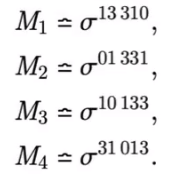

In [6]:
M1 = np.kron(np.kron(np.kron(np.kron(sigma_x, sigma_z), sigma_z), sigma_x), identity)
M2 = np.kron(np.kron(np.kron(np.kron(identity, sigma_x), sigma_z), sigma_z), sigma_x)
M3 = np.kron(np.kron(np.kron(np.kron(sigma_x, identity), sigma_x), sigma_z), sigma_z)
M4 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_x), identity), sigma_x), sigma_z)

np.sum(np.abs(M1))

np.float64(32.0)

In [7]:
bit2 = np.array([1, 0])
bit3 = np.array([1, 0])
bit4 = np.array([1, 0])
bit5 = np.array([1, 0])

bit1 = np.array([1, 0])
bits = np.kron(np.kron(np.kron(np.kron(bit1, bit2), bit3), bit4), bit5)
bits

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

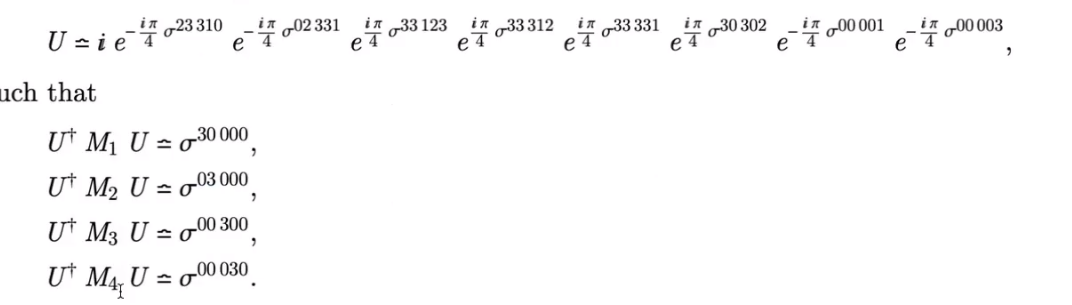

In [41]:
op1 = np.kron(np.kron(np.kron(np.kron(sigma_y, sigma_z), sigma_z), sigma_x), identity)
op2 = np.kron(np.kron(np.kron(np.kron(identity, sigma_y), sigma_z), sigma_z), sigma_x)
op3 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_x), sigma_y), sigma_z)
op4 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_z), sigma_x), sigma_y)
op5 = np.kron(np.kron(np.kron(np.kron(sigma_z, sigma_z), sigma_z), sigma_z), sigma_x)
op6 = np.kron(np.kron(np.kron(np.kron(sigma_z, identity), sigma_z), identity), sigma_y)
op7 = np.kron(np.kron(np.kron(np.kron(identity, identity), identity), identity), sigma_x)
op8 = np.kron(np.kron(np.kron(np.kron(identity, identity), identity), identity), sigma_z)

def mat_exp(op):
    U0, S, Vt = np.linalg.svd( op, full_matrices=False)
    return U0 @ np.diag(np.exp(1j * np.pi / 4 * S)) @ Vt
# np.eye(32) @

U = (1j * np.eye(32)) @ mat_exp(-op1) @ mat_exp(-op2) @ mat_exp(op3) @ mat_exp(op4) @ mat_exp(op5) @ mat_exp(op6) @ mat_exp(-op7) @ mat_exp(-op8)

U

array([[ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        -1.+6.24714256e-16j],
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j, -1.+6.24714256e-16j,
         0.+0.00000000e+00j],
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  1.-6.24714256e-16j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       ...,
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  1.-6.24714256e-16j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [ 0.+0.00000000e+00j, -1.+6.24714256e-16j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [-1.+6.24714256e-16j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        ...,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j]])

In [43]:
np.conjugate(U.T) @ U

array([[1.+4.0106817e-32j, 0.+0.0000000e+00j, 0.+0.0000000e+00j, ...,
        0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j],
       [0.+0.0000000e+00j, 1.+4.0106817e-32j, 0.+0.0000000e+00j, ...,
        0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j],
       [0.+0.0000000e+00j, 0.+0.0000000e+00j, 1.+4.0106817e-32j, ...,
        0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j],
       ...,
       [0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j, ...,
        1.+4.0106817e-32j, 0.+0.0000000e+00j, 0.+0.0000000e+00j],
       [0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j, ...,
        0.+0.0000000e+00j, 1.+4.0106817e-32j, 0.+0.0000000e+00j],
       [0.+0.0000000e+00j, 0.+0.0000000e+00j, 0.+0.0000000e+00j, ...,
        0.+0.0000000e+00j, 0.+0.0000000e+00j, 1.+4.0106817e-32j]])

In [10]:
A = np.conjugate(U.T) @ M1 @ U
A.diagonal()

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [11]:
np.kron(np.kron(np.kron(np.kron(sigma_z, identity), identity), identity), identity).diagonal()

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
       -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,
       -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j])

In [7]:
'7量子比特steane编码'
K1=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(identity,identity),identity),sigma_x),sigma_x),sigma_x),sigma_x)
K2=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(sigma_x,identity),sigma_x),identity),sigma_x),identity),sigma_x)
K3=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(identity,sigma_x),sigma_x),identity),identity),sigma_x),sigma_x)
K4=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(identity,identity),identity),sigma_z),sigma_z),sigma_z),sigma_z)
K5=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(sigma_z,identity),sigma_z),identity),sigma_z),identity),sigma_z)
K6=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(identity,sigma_z),sigma_z),identity),identity),sigma_z),sigma_z)
I=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(identity,identity),identity),identity),identity),identity),identity)
q=np.array([1, 0])
s0=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(q,q),q),q),q),q),q)
p=np.array([0, 1])
s1=np.kron(np.kron(np.kron(np.kron(np.kron(np.kron(p,p),p),p),p),p),p)


K=(I+K1)@(I+K2)@(I+K3)@(I+K4)@(I+K5)@(I+K6)
K@K.T




array([[2.64697796e-23+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       ...,
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j],
       [0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j, ...,
        0.00000000e+00+0.j, 0.00000000e+00+0.j, 2.64697796e-23+0.j]])

In [ ]:
def quantum_mutual_information(rho_ab, rho_a, rho_b):
    """
    计算两个量子系统之间的量子互信息。

    参数:
    rho_ab (numpy.ndarray): 两个系统的联合密度矩阵。
    rho_a (numpy.ndarray): 第一个系统的密度矩阵。
    rho_b (numpy.ndarray): 第二个系统的密度矩阵。
    """
    rho_ab_eig = np.linalg.eig(rho_ab)[0]
    rho_a_eig = np.linalg.eig(rho_a)[0]
    rho_b_eig = np.linalg.eig(rho_b)[0]
    S_ab,S_a,S_b = 0,0,0
    threshold = 1e-10
    for i in range(len(rho_ab_eig)):
        if (rho_ab_eig[i]!=0) and (np.abs(rho_ab_eig[i])>threshold):
            S_ab -= rho_ab_eig[i] * np.log2(rho_ab_eig[i])
    for i in range(len(rho_a_eig)):
        if rho_a_eig[i] != 0:
            S_a -= rho_a_eig[i] * np.log2(rho_a_eig[i])
        if rho_b_eig[i] != 0:
            S_b -= rho_b_eig[i] * np.log2(rho_b_eig[i])
    I = S_a + S_b - S_ab
    return I

def partial_trace(rho_ab):
    I = rho_ab[0:2, 0:2]
    J = rho_ab[0:2, 2:4]
    K = rho_ab[2:4, 0:2]
    L = rho_ab[2:4, 2:4]
    rho_a = np.array([[np.trace(I),np.trace(J)],[np.trace(K),np.trace(L)]])
    rho_b = I + L
    return rho_a, rho_b

def quantum2_EI(K_ls):
    '''专用于退极化信道
    '''
    state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    rho_ab = np.outer(state, state)

    rho_ab_new = 0
    for K in K_ls:
        K = np.kron(K, identity)
        rho_ab_new += K @ rho_ab @ np.conjugate(K.T)
      
    rho_a_new, rho_b_new = partial_trace(rho_ab_new)
    
    EI = quantum_mutual_information(rho_ab_new, rho_a_new, rho_b_new)
    return EI